
# **Predicitng Diabetes | Self Project [’20]**

**Eshwar Sai Battu: 193040044**

 The data set is obtained from UCI machine learning repository but this dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

 The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements, like incsulin,glucose and blood pressure, included in the dataset. 

 Performed the exploratory data analysis to understand the nature of data, by plotting different types of plots like bar plots, box plots, violin plots and histograms. 

 Performed data wrangling to clean and fill the missing values in the dataset and make it ready for the model fitting

 Trained the model using Logistic regression and SVM with three different kernels namely linear, polynomial and RBF by optimizing hyperparameters.

 SVM with rbf kernel showed better performance with F1 - score **0.775** and accuracy score **0.85**

# Importing Required libraries


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns 
from sklearn.model_selection import train_test_split #To split the data into train set and test set
from sklearn.preprocessing import scale # To scale the data
from sklearn.svm import SVC  #To implement the SVM
from sklearn.model_selection import GridSearchCV # To optimize the models
from sklearn.metrics import plot_confusion_matrix # To plot confusion matrix
from sklearn.metrics import accuracy_score # To find the accuracy of the model
from sklearn.linear_model import LogisticRegression # To implement the Logitic Regression
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import classification_report #To get the classification report
from sklearn.metrics import f1_score #To get the f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Data Descriptions:**

Pregnancies = No. of times a pregnancy has occurred

Glucose = Plasma glucose concentration a 2 hours in an oral glucose 
tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insuling = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (in years)

Outcome = Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
print(' Length of the dataset is {}.'.format(df.shape[0]))

 Length of the dataset is 768.


In [ ]:
p_positive=sum(df['Outcome']==1)/len(df)
print("Percentage of positive outcome in the data {}".format(p_positive*100))

Percentage of positive outcome in the data 34.89583333333333


In [ ]:
print('Information regarding the data types')
df.dtypes

Information regarding the data types


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In the plot below 0 indicates No diabetes and 1 indiates Diabetes.


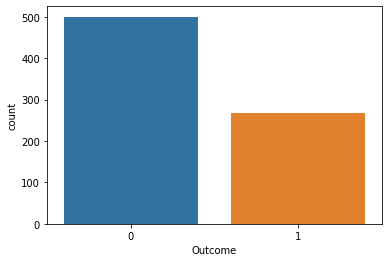

In [ ]:
sns.countplot(x="Outcome",data = df )
print("In the plot below 0 indicates ""No diabetes"" and 1 indiates ""Diabetes""." )

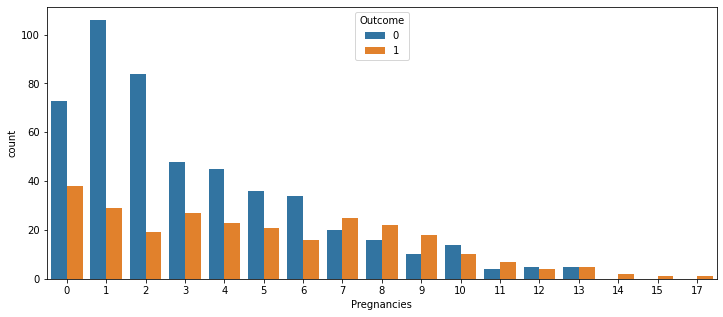

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="Pregnancies",hue="Outcome",data = df )

It can be seen that as the number of pregnancies is increasing women are more prone to it.

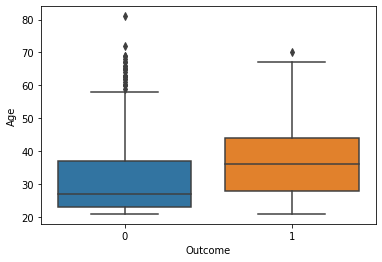

In [ ]:
sns.boxplot(x="Outcome",y="Age",data=df)

It can be intererpreted from the above graph that majorly older women are affected with diabetes than younger women 

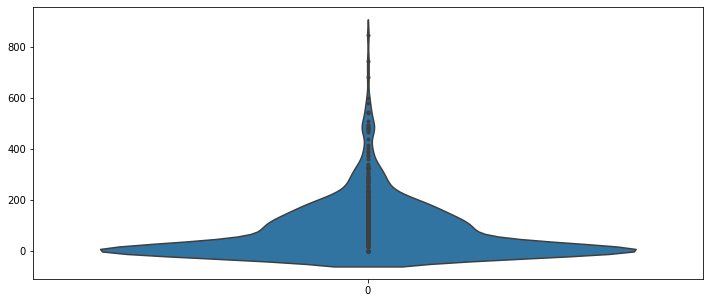

In [ ]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df['Insulin'], inner="points")    

Many values of insulin are zero which is impractical. We will deal with this in data wrangling

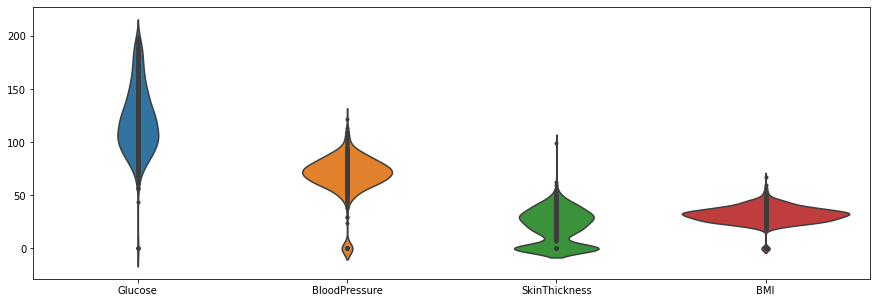

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df[['Glucose','BloodPressure','SkinThickness','BMI']], inner="points")   

Few values of glucose, blood pressure, skin thickness and BMI are zero which is impractical. We will deal with this in data wrangling

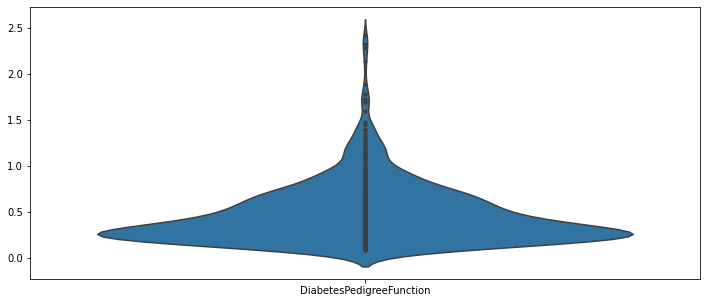

In [ ]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df[['DiabetesPedigreeFunction']], inner="points")   

In [ ]:
print('Statistical characteritics of the data')
df.describe(percentiles=[0.2,0.4,0.6,0.8,0.9])

Statistical characteritics of the data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
20%,1.000000,95.000000,60.000000,0.000000,0.000000,25.900000,0.219400,23.000000,0.000000
40%,2.000000,109.000000,68.000000,18.000000,0.000000,30.100000,0.302800,27.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
60%,4.000000,125.000000,74.000000,27.000000,72.200000,33.700000,0.454200,33.000000,0.000000
80%,7.000000,147.000000,82.000000,35.000000,150.000000,37.800000,0.687000,42.600000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000


#Data Wrangling


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Even though the number of null values appear to be zero, by looking at the violin plots and statistical parameters in the data analysis step we can find that there are zero values for Insulin, Glucose level, Blood Pressure, Skin Thickness and BMI which is practically not possible. Those zero values are the null values here. So replace all the zeroes with the null values in the mentioned columns.

In [ ]:
df.where(df.iloc[:,1:df.shape[1]-1] != 0, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

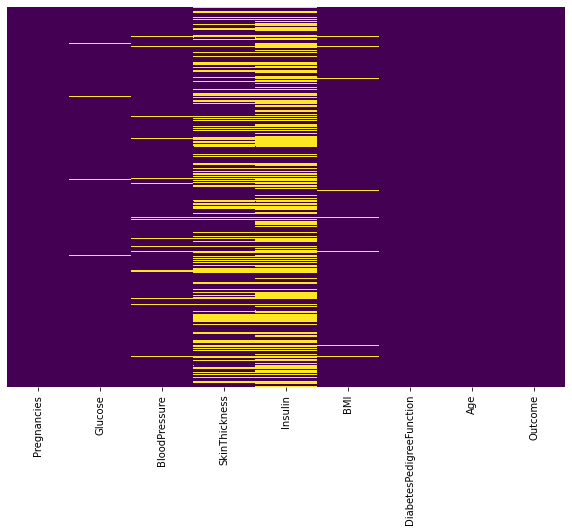

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels= False,cmap='viridis',cbar=False)

From the above heatmap it is clear there are significant number of null values in Insulin and skin thickness columns. So we cannot drop the datapoints of null values and instead we can replace them with mean values.

In [ ]:
data_grupd = df.groupby('Outcome').mean()
data_grupd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = data_grupd['Insulin'][0]
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = data_grupd['Insulin'][1]

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = data_grupd['Glucose'][0]
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = data_grupd['Glucose'][1]

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = data_grupd['BloodPressure'][0]
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = data_grupd['BloodPressure'][1]

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = data_grupd['SkinThickness'][0]
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = data_grupd['SkinThickness'][1]

In [ ]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = data_grupd['BMI'][0]
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = data_grupd['BMI'][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


**Let us analyze the cleaned data**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

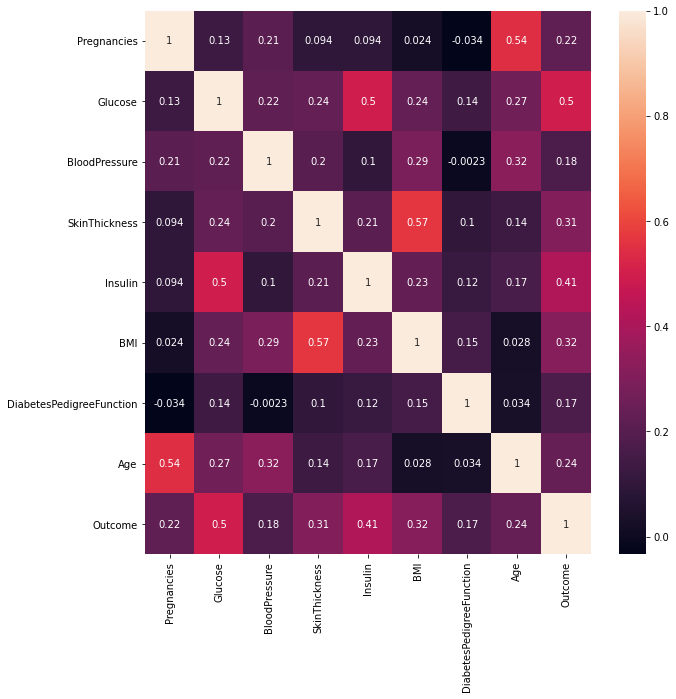

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cbar=True)

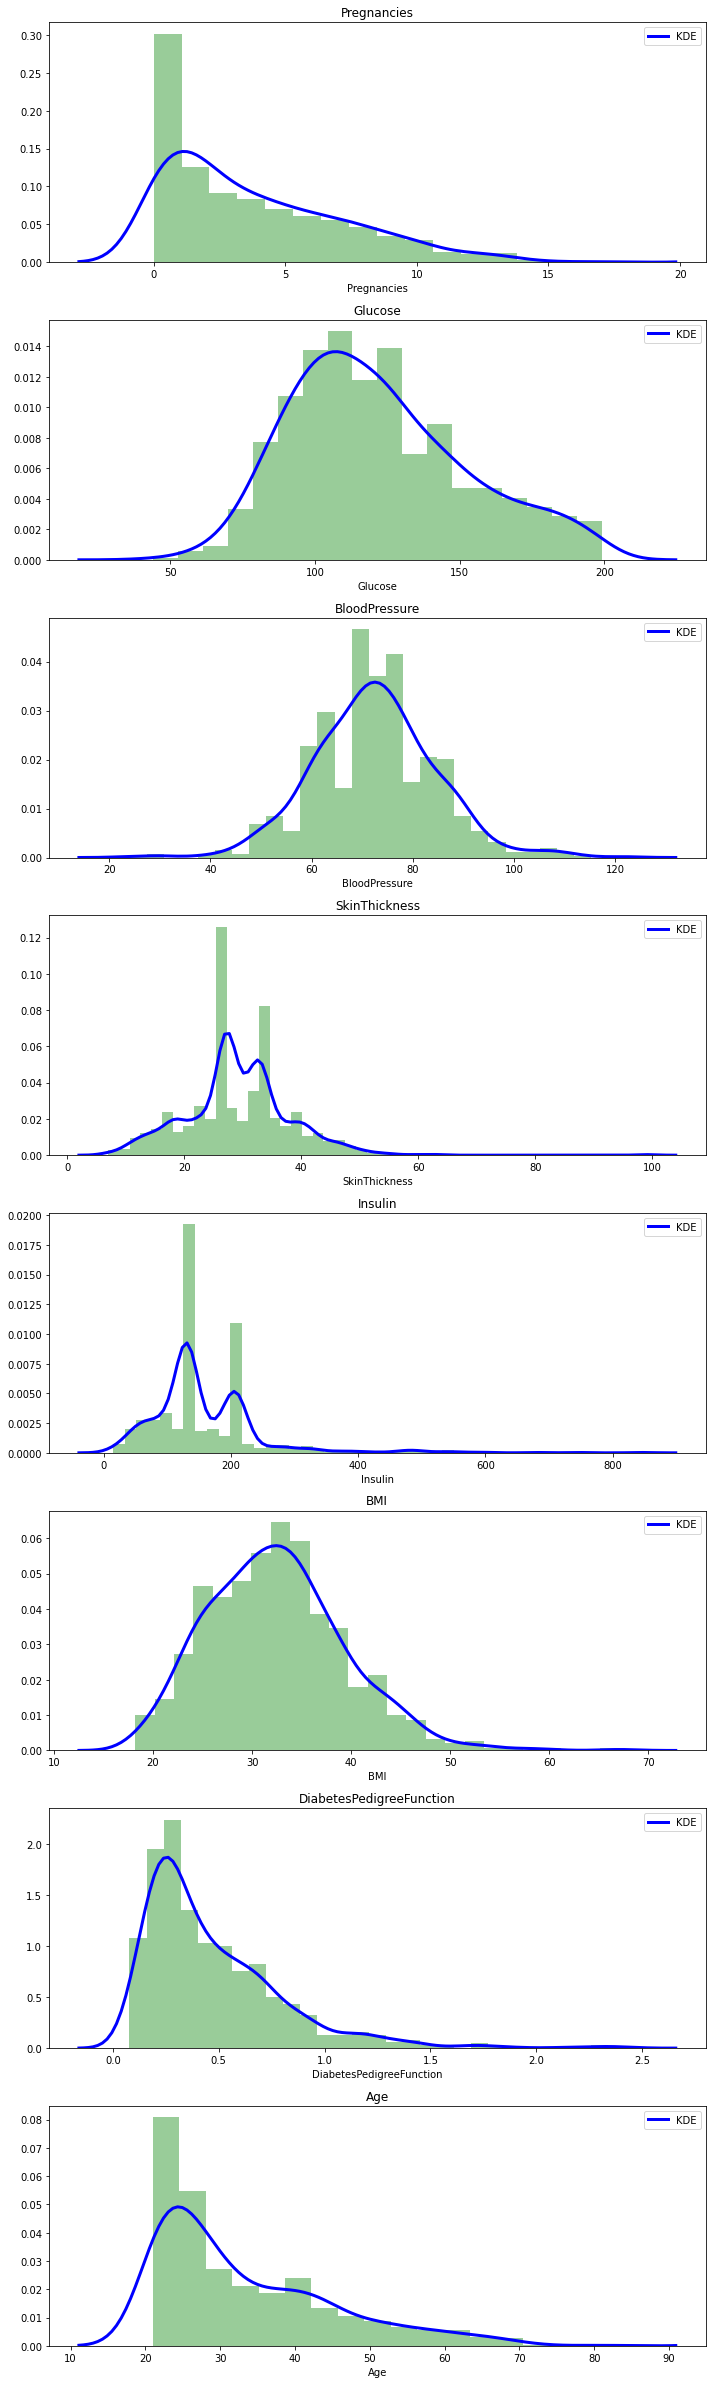

In [ ]:
plt.figure(figsize=(10,70))
for i in range(len(df.columns)-1):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

#Train and test the data

In [ ]:
X = df.iloc[:,:-1].copy()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33


In [ ]:
y = df.iloc[:,-1].copy()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

**Implementing Logistic regression to classify the data**

In [ ]:
param_grid = [
  {'C': [1000,100,10,1,0.1,0.01,0.001]}
 ]

optimal_params = GridSearchCV(
        LogisticRegression(), 
        param_grid,
        cv=5,
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 0.1}


In [ ]:
logmodel = LogisticRegression(C=optimal_params.best_params_['C'],random_state=42)
logmodel.fit(X_train_scaled,y_train)
y_pred=logmodel.predict(X_test_scaled)

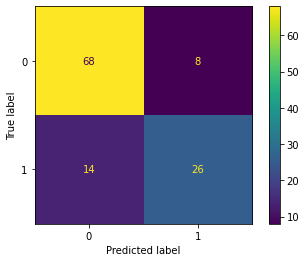

In [ ]:
plot_confusion_matrix(logmodel, 
                      X_test_scaled, 
                      y_test)

In [ ]:
logmodel_em=(classification_report(y_test,y_pred,labels=[1],output_dict = True))
f_1 = f1_score(y_test,y_pred)
logmodel_em['1']['accuracy_score'] = accuracy_score(y_test,y_pred)
logmodel_em = logmodel_em['1']
print(logmodel_em)

{'precision': 0.7647058823529411, 'recall': 0.65, 'f1-score': 0.7027027027027027, 'support': 40, 'accuracy_score': 0.8103448275862069}


**Implementing SVM with linear kernel**

In [ ]:
param_grid = [
  {'C': [1000,100,10,1], 
   'kernel': ['linear']}
 ]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'kernel': 'linear'}


In [ ]:
clf_svm = SVC(C=optimal_params.best_params_['C'],random_state=42,kernel = 'linear')
clf_svm.fit(X_train_scaled, y_train)
y_pred=clf_svm.predict(X_test_scaled)

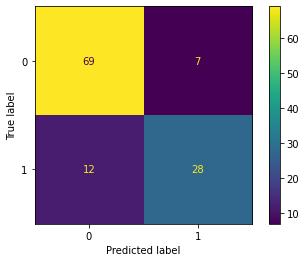

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test)

In [ ]:
svm_linear=(classification_report(y_test,y_pred,labels=[1],output_dict = True))
f_1 = f1_score(y_test,y_pred)
svm_linear['1']['accuracy_score'] = accuracy_score(y_pred,y_test)
svm_linear = svm_linear['1']
print(svm_linear)

{'precision': 0.8, 'recall': 0.7, 'f1-score': 0.7466666666666666, 'support': 40, 'accuracy_score': 0.8362068965517241}


**Implementing SVM with polynomial kernel**

In [ ]:
param_grid = [
  {'C': [100,10,1], 
   'degree' : [2,3,4],
   'kernel': ['poly']}
 ]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'degree': 3, 'kernel': 'poly'}


In [ ]:
clf_svm = SVC(C=optimal_params.best_params_['C'], random_state=42)
clf_svm.fit(X_train_scaled, y_train)
y_pred=clf_svm.predict(X_test_scaled)

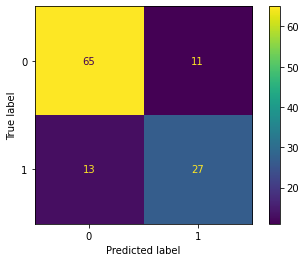

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test)

In [ ]:
svm_poly=(classification_report(y_test,y_pred,labels=[1],output_dict = True))
f_1 = f1_score(y_test,y_pred)
svm_poly['1']['accuracy_score'] = accuracy_score(y_pred,y_test)
svm_poly = svm_poly['1']
print(svm_poly)

{'precision': 0.7105263157894737, 'recall': 0.675, 'f1-score': 0.6923076923076923, 'support': 40, 'accuracy_score': 0.7931034482758621}


**Implementing SVM with rbf kernel**

In [ ]:
param_grid = [
  {'C' : [1000,100,10,1], 
   'gamma' : [1,0.1,0.01],
   'kernel': ['rbf']}
 ]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
 clf_svm = SVC(C=optimal_params.best_params_['C'],gamma = optimal_params.best_params_['gamma'], random_state=50)
clf_svm.fit(X_train_scaled, y_train)
y_pred=clf_svm.predict(X_test_scaled)

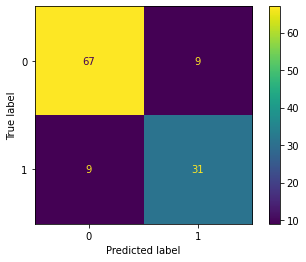

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test)

In [ ]:
svm_rbf=(classification_report(y_test,y_pred,labels=[1],output_dict = True))
f_1 = f1_score(y_test,y_pred)
svm_rbf['1']['accuracy_score'] = accuracy_score(y_pred,y_test)
svm_rbf = svm_rbf['1']
print(svm_rbf)

{'precision': 0.775, 'recall': 0.775, 'f1-score': 0.775, 'support': 40, 'accuracy_score': 0.8448275862068966}


In [ ]:
af=pd.DataFrame([svm_rbf,svm_poly,svm_linear,logmodel_em],index=['svm_rbf','svm_poly','svm_linear','logmodel_em']).drop('support',axis=1)

In [ ]:
af

,precision,recall,f1-score,accuracy_score
svm_rbf,0.775000,0.775,0.775000,0.844828
svm_poly,0.710526,0.675,0.692308,0.793103
svm_linear,0.800000,0.700,0.746667,0.836207
logmodel_em,0.764706,0.650,0.702703,0.810345


Based on f1-score and accuracy score, support vector machine with radial basis function can be regarded as best model for the given dataset 